<a href="https://colab.research.google.com/github/risa1796/Forecasting-Regression-exercises/blob/main/E_Commerce_Jewelry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce purchase history from jewelry store

What can I do with this dataset?

- EDA 
- Forecasting total sales 
- Product Recommendation 

## 1. Data Upload

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('/content/drive/MyDrive/딥러닝기초/jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


## 2. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        47743 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


Check missing values per column

In [4]:
df.isna().sum()

Datetime            0
OrderID             0
ProductID           0
Quantity            0
CategoryID       5352
CategoryCode     9933
BrandID          4785
USDPrice         5352
UserID           5352
Gender          48168
Color            7660
Metal            5462
Gem             34058
dtype: int64

### 2.1 Gender

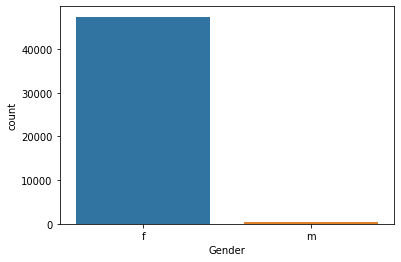

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'Gender')

The majority of customers are female, let's replace the missing values with 'f'.

In [6]:
df.Gender.fillna('f', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        95911 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


### 2.2 Quantity

In [7]:
df.Quantity.unique()

array([1])

Since there is only one unique value in the 'Quantity' feature, we will drop the column.

In [8]:
df.drop('Quantity',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


### 2.3 USD Price & User ID

In [9]:
df.USDPrice.isna().sum()

5352

In [10]:
print(df[df['USDPrice'].isna()].Gem.unique())
print(df[df['USDPrice'].isna()].Metal.unique())
print(df[df['USDPrice'].isna()].BrandID.unique())

[nan]
[nan]
[1.55061295e+18 1.32515621e+18 1.51591563e+18 ... 1.51591563e+18
 1.51591563e+18 1.51591563e+18]


In [11]:
df[df['USDPrice'].isna()].BrandID.value_counts()

1.515916e+18    147
1.515916e+18    104
1.515916e+18     74
1.515916e+18     37
1.515916e+18     34
               ... 
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
Name: BrandID, Length: 2530, dtype: int64

In [12]:
df[df['BrandID']==1515915625368881664.000000].describe()

,OrderID,ProductID,CategoryID,BrandID,USDPrice,UserID
count,3.400000e+01,3.400000e+01,0.0,3.400000e+01,0.0,0.0
mean,2.638980e+18,1.511337e+18,NaN,1.515916e+18,NaN,NaN
std,3.443835e+16,2.699059e+16,NaN,2.598498e+02,NaN,NaN
min,2.532276e+18,1.358585e+18,NaN,1.515916e+18,NaN,NaN
25%,2.625246e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
50%,2.657495e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
75%,2.661770e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
max,2.676981e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN


There is Order ID but no price and no user ID ?

What we are interested is eventually the sales and not the number of orders. 

Let's delete rows with missing values in USDPrice and UserID.

In [13]:
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  80626 non-null  object 
 5   BrandID       85774 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 9.0+ MB


### 2.4 Category Code

We will fill missing values with 'other'

In [15]:
new_df.CategoryCode.fillna('other', inplace=True)

In [16]:
new_df.CategoryCode.value_counts()

jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: CategoryCode, dtype: int64

### 2.5 Brand ID

Brands IDs are integers. We will fill missing values with -1.

In [17]:
new_df['BrandID'].fillna('-1',inplace=True)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


### 2.6 Gem & Metal & Color

Replace missing values with 'unknown'

In [19]:
new_df['Gem'].unique()

array(['diamond', nan, 'sapphire', 'amethyst', 'fianit', 'pearl',
       'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby', 'agate',
       'mix', 'citrine', 'emerald', 'amber', 'chrysolite', 'chrysoprase',
       'nanocrystal', 'turquoise', 'sitall', 'corundum_synthetic',
       'coral', 'onyx', 'nacre', 'spinel', 'tourmaline',
       'emerald_geothermal', 'garnet_synthetic', 'rhodolite',
       'sapphire_geothermal'], dtype=object)

In [20]:
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         90559 non-null  object 
 10  Metal         90559 non-null  object 
 11  Gem           90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


Now we have new dataset with no missing values!

## 3. EDA

### 3.1 Color

red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: Color, dtype: int64


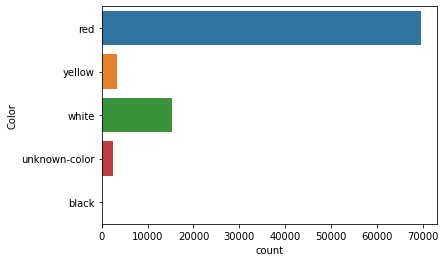

In [22]:
print(new_df.Color.value_counts())
sns.countplot(y ='Color', data = new_df)

> Red color is most popular.

### 3.2 Metal types per Brand ID

gold        89082
silver       1365
unknown       110
platinum        2
Name: Metal, dtype: int64


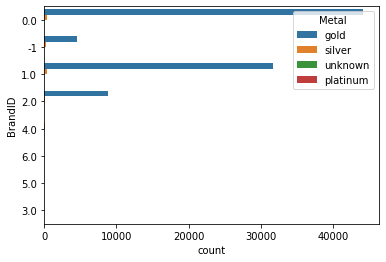

In [23]:
print(new_df.Metal.value_counts())
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

> Gold is most popular.

### 3.3 Gem

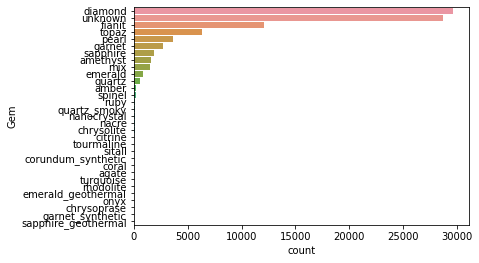

In [24]:
sns.countplot(data = new_df, y = 'Gem', order = new_df['Gem'].value_counts().index)

> Diamond is most popular.

### 3.4 Category Code

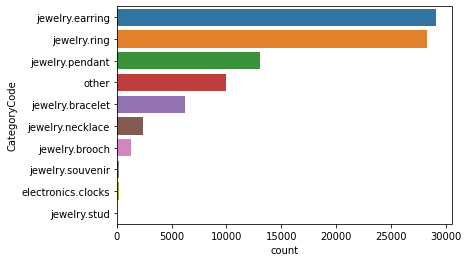

In [25]:
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

> Most of the customers have bought earrings followed by rings.

### 3.5 Brand ID

0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: BrandID, dtype: int64


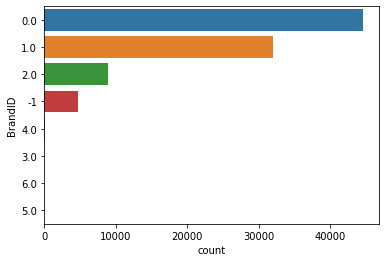

In [26]:
print(new_df.BrandID.value_counts())
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

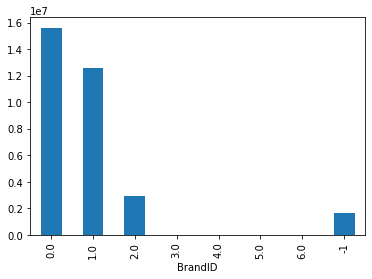

In [27]:
new_df.groupby('BrandID').USDPrice.sum().plot.bar()

> Brand ID 0 is most popular and reached the highest sales.

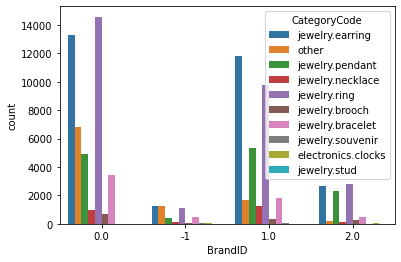

In [28]:
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

> Customers like rings from Brand ID 0 the most. Earrings from Brand ID 1 seem popular. 

## 4. Total sales Forecasting

### 4.1 Data Preprocessing

In [29]:
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [30]:
from datetime import datetime

new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 11.0+ MB


In [31]:
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


Total sum of price per day

In [32]:
sales_df =  pd.pivot_table(new_df, 
                 index= 'Datetime' ,
                 values= 'USDPrice'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.head()

,Datetime,USDPrice
0,2018-12-01,773.65
1,2018-12-02,897.47
2,2018-12-03,978.85
3,2018-12-04,3486.05
4,2018-12-05,1246.58


In [33]:
sales_df.sort_values('Datetime',inplace=True)

### 4.2 Plot history

In [34]:
import numpy as np

# sns.regplot cant read date type in x so ....
sales_df['Time'] = np.arange(len(sales_df.index))

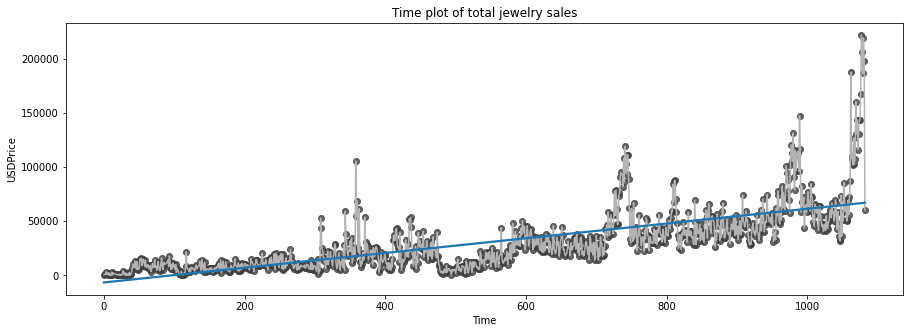

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sales_df['Time'], sales_df["USDPrice"],  color='0.7')
ax = sns.regplot(sales_df['Time'], sales_df["USDPrice"],  ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of total jewelry sales');

In [36]:
print(f'Total number of days in sales_df: {sales_df.Time.max()} days')

Total number of days in sales_df: 1082 days


Let's print the first 5 rows and the last 5 rows in sales_df.

In [37]:
display(sales_df.head())
display(sales_df.tail())

,Datetime,USDPrice,Time
0,2018-12-01,773.65,0
1,2018-12-02,897.47,1
2,2018-12-03,978.85,2
3,2018-12-04,3486.05,3
4,2018-12-05,1246.58,4


,Datetime,USDPrice,Time
1078,2021-11-27,206071.70,1078
1079,2021-11-28,186474.59,1079
1080,2021-11-29,219555.01,1080
1081,2021-11-30,197417.90,1081
1082,2021-12-01,60113.20,1082


What happened in the last day?? 

In [38]:
sales_df.drop('Time',axis=1,inplace=True)

### 4.3 Convert to Time-Series problem

In [39]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

We will train a model with data from the past 30 days to predict sales of 60 days ahead! 

In [40]:
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.65,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,...,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,12764.49
31,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,...,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,14353.13
32,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,...,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,8185.48
33,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,...,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,17748.04
34,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,2443.00,...,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,1045.02,12493.57


### 4.4 Data Split

In [41]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [42]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Reshape to 3D Tensor 

In [43]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (476, 31, 1)
Validation set shape (318, 31, 1)
Validation set shape (199, 31, 1)


Check few samples in validation data.

In [44]:
pd.DataFrame(X_valid).head(3)

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
194,4610.59,9428.83,14496.44,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,...,9692.96,15112.52,9859.27,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27
610,24114.55,47956.47,20734.53,29053.79,21117.25,40586.51,28532.89,28065.77,31925.34,28368.23,...,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,35512.78,23751.10
687,19583.59,20465.97,24501.21,31472.21,25540.85,24641.04,18003.41,30148.61,25386.44,23518.49,...,35369.95,33891.31,19158.13,22322.18,17815.32,19397.82,25410.44,30309.50,31418.69,25091.60


We wish our model good luck with identifying and learning the patterns within the time-series data.

### 4.5 LSTM Model

In [45]:
epochs = 200
batch = 65
lr = 0.0005
adam = optimizers.Adamax()

Use dropout layers to avoid overfitting.

In [46]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(165,activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(56))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=adam)
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 165)               110220    
                                                                 
 dropout (Dropout)           (None, 165)               0         
                                                                 
 dense (Dense)               (None, 56)                9296      
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 57        
                                                                 
Total params: 119,573
Trainable params: 119,573
Non-trainable params: 0
_________________________________________________________________


### 4.6 Train Model

In [47]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/200
15/15 - 10s - loss: 34474.9570 - val_loss: 20864.7129 - 10s/epoch - 691ms/step
Epoch 2/200
15/15 - 2s - loss: 34206.6758 - val_loss: 18749.9238 - 2s/epoch - 132ms/step
Epoch 3/200
15/15 - 2s - loss: 33576.4062 - val_loss: 19398.6074 - 2s/epoch - 127ms/step
Epoch 4/200
15/15 - 2s - loss: 32272.5391 - val_loss: 18542.9531 - 2s/epoch - 145ms/step
Epoch 5/200
15/15 - 2s - loss: 30034.0664 - val_loss: 17709.4883 - 2s/epoch - 156ms/step
Epoch 6/200
15/15 - 2s - loss: 28687.6855 - val_loss: 17657.7051 - 2s/epoch - 137ms/step
Epoch 7/200
15/15 - 2s - loss: 27239.8965 - val_loss: 16846.2188 - 2s/epoch - 117ms/step
Epoch 8/200
15/15 - 2s - loss: 24987.4707 - val_loss: 17260.4219 - 2s/epoch - 112ms/step
Epoch 9/200
15/15 - 2s - loss: 24783.4512 - val_loss: 16258.5664 - 2s/epoch - 124ms/step
Epoch 10/200
15/15 - 1s - loss: 26522.0742 - val_loss: 18890.2891 - 1s/epoch - 95ms/step
Epoch 11/200
15/15 - 1s - loss: 26357.2344 - val_loss: 18206.4902 - 941ms/epoch - 63ms/step
Epoch 12/200
15/

### 4.7 Plot Training 

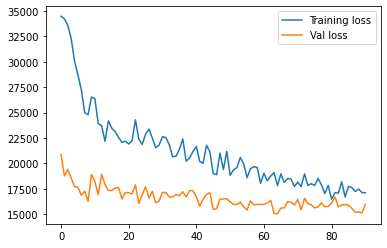

In [48]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

### 4.8 Model Evaluation

In [49]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

10/10 [==============================] - 0s 22ms/step
Train rmse: 22914.346968788144
Validation rmse: 24689.106623525047


In [50]:
length = len(lstm_valid_pred) 

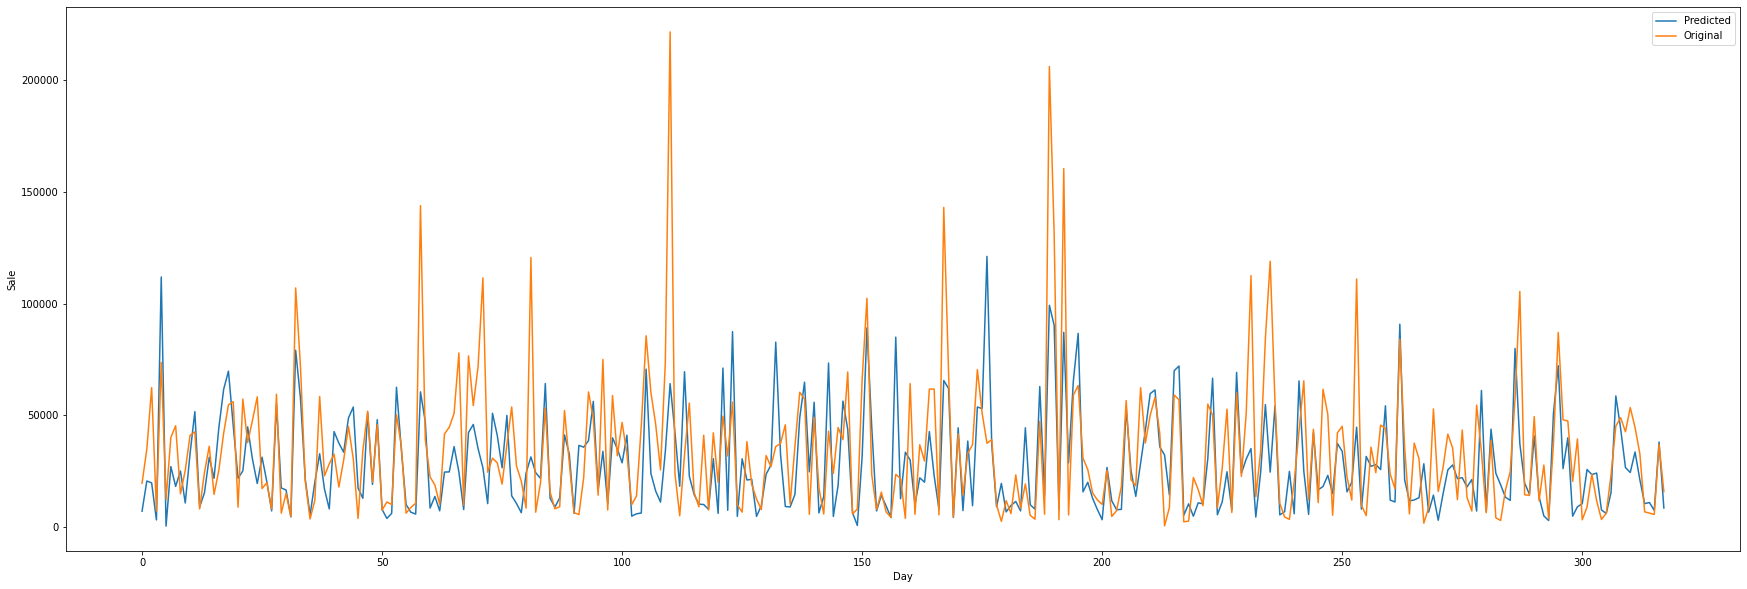

In [51]:
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

### 4.9 Test Model

In [52]:
lstm_test_pred = model_lstm.predict(X_test_series)
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, lstm_test_pred)))

7/7 [==============================] - 0s 20ms/step
Test rmse: 24814.020459781717


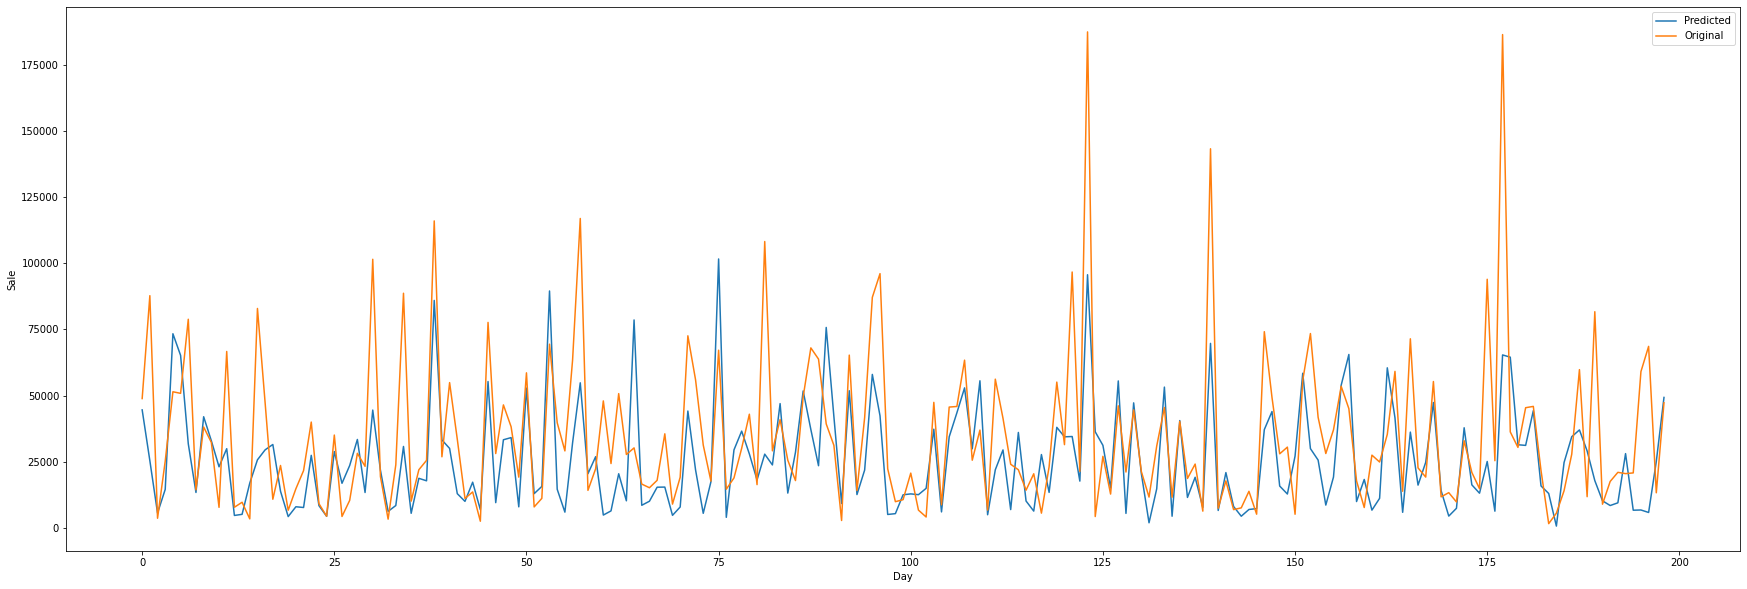

In [54]:
length_test = len(lstm_test_pred) 

x = np.arange(0, length_test)
y1 = lstm_test_pred[:length_test]
y2 = Y_test[:length_test]

plt.figure(figsize=(30, 10))

plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()